### Implementing Simple ChatBOT using LangGraph

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START,END

### Reducers  
from typing import Annotated #Annotated is used to add metadata to the type of the messages list in the State TypedDict
from langgraph.graph.message import add_messages #add_messages is a function that adds messages to the state of the graph which is a reducer function that takes the current state and a message and returns a new state with the message added to the messages list in the state.


In [2]:
class State(TypedDict): #TypedDict for the state of the graph which can return a list of messages in dict form
    messages:Annotated[list,add_messages]

In [5]:
import os
from dotenv import load_dotenv  # To load the .env file
load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [21]:
from langchain.chat_models import init_chat_model
from langchain_openai import ChatOpenAI

#llm_openai = ChatOpenAI(model="gpt-4.o",temperature=0.4)
#llm_openai.invoke("Hello, how are you?")

llm = init_chat_model(model="groq:llama-3.1-8b-instant")
llm.invoke("hello, im jack and i like to play cricket?")

AIMessage(content="Hello Jack, nice to meet you. That's great to hear that you like playing cricket. Cricket is a fantastic sport that requires skill, strategy, and teamwork. Which position do you play in the game? Are you a batsman, bowler, or an all-rounder?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 59, 'prompt_tokens': 46, 'total_tokens': 105, 'completion_time': 0.083387197, 'completion_tokens_details': None, 'prompt_time': 0.002308448, 'prompt_tokens_details': None, 'queue_time': 0.047705842, 'total_time': 0.085695645}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c6682-866e-7a10-b775-0b0af96fff75-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 46, 'output_tokens': 59, 'total_tokens': 105})

### We will Start with creating Nodes

In [22]:
# def superbot(state:State, message:str)  -> State:
#     response = llm.invoke(message)
#     return add_messages(state, response)


def superbot(state:State):
    return {"messages": [llm.invoke(state["messages"])]}

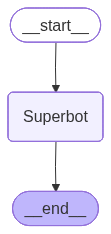

In [23]:
# Create the graph
graph = StateGraph(State)


## Nodes
graph.add_node("Superbot", superbot)


## Edges
graph.add_edge(START, "Superbot")
graph.add_edge("Superbot", END)

graph_builder = graph.compile()

## Display The Graph

## View
from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [24]:
### Invocation - Method 1: Using the graph builder directly

graph_builder.invoke({"messages": ["What is the capital of France?"]})

{'messages': [HumanMessage(content='What is the capital of France?', additional_kwargs={}, response_metadata={}, id='f5b1f42c-9ff0-4b36-9a91-c6f33aa9efa1'),
  AIMessage(content='The capital of France is Paris.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 42, 'total_tokens': 50, 'completion_time': 0.007073432, 'completion_tokens_details': None, 'prompt_time': 0.001926024, 'prompt_tokens_details': None, 'queue_time': 0.046886793, 'total_time': 0.008999456}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c6682-a880-70c2-8c0a-0e803d4c8d36-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 42, 'output_tokens': 8, 'total_tokens': 50})]}

#### Streaming the responses - method2

In [25]:
#graph.stream({"messages": ["What is the capital of France?"]})

graph_builder.stream({"messages": "What is the capital of India?"})

<generator object Pregel.stream at 0x000002BE19690950>

In [29]:
for event in graph_builder.stream({"messages": "What is the capital of India?"}):
    print(event)

{'Superbot': {'messages': [AIMessage(content='The capital of India is New Delhi.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 42, 'total_tokens': 51, 'completion_time': 0.007596956, 'completion_tokens_details': None, 'prompt_time': 0.002067791, 'prompt_tokens_details': None, 'queue_time': 0.052488228, 'total_time': 0.009664747}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c6684-84da-7e90-8f1c-b2ccc97444b7-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 42, 'output_tokens': 9, 'total_tokens': 51})]}}


In [31]:
for event in graph_builder.stream({"messages": "What is the capital of India?"},stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='What is the capital of India?', additional_kwargs={}, response_metadata={}, id='6deed4b0-23e8-47fa-9498-2e2b78784958')]}
{'messages': [HumanMessage(content='What is the capital of India?', additional_kwargs={}, response_metadata={}, id='6deed4b0-23e8-47fa-9498-2e2b78784958'), AIMessage(content='The capital of India is New Delhi.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 42, 'total_tokens': 51, 'completion_time': 0.006451388, 'completion_tokens_details': None, 'prompt_time': 0.002032528, 'prompt_tokens_details': None, 'queue_time': 0.045561759, 'total_time': 0.008483916}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c6684-b660-7333-96e7-c12c6fd88fe9-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 42, 'output_tokens': 9, 'tota

In [32]:
for event in graph_builder.stream({"messages": "What is the capital of India?"},stream_mode="updates"):
    print(event)

{'Superbot': {'messages': [AIMessage(content='The capital of India is New Delhi.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 42, 'total_tokens': 51, 'completion_time': 0.005197078, 'completion_tokens_details': None, 'prompt_time': 0.004674466, 'prompt_tokens_details': None, 'queue_time': 0.064671894, 'total_time': 0.009871544}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c6684-d267-70b0-bfa2-23760f598b62-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 42, 'output_tokens': 9, 'total_tokens': 51})]}}
